# SVC
(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)


* <font color=red>C</font>: float, optional (default=1.0)   
错误项的惩罚参数C。
* <font color=red>kernel</font>: string, optional (default=’rbf’)   
指定算法中使用的内核类型。它必须是'linear','poly','rbf','sigmoid','precomputed'或可调用的。如果没有，则使用“rbf”。如果给定了一个可调用函数，则用它从数据矩阵中预先计算核矩阵;这个矩阵应该是一个形状数组(n_samples, n_samples)。
* <font color=red>degree</font>: int, optional (default=3)  
多项式核函数的次数。被所有其他内核忽略。
* <font color=red>gamma</font>: float, optional (default=’auto’)   
内核系数'rbf','poly','sigmoid'.当前默认值是'auto'，它使用1/n_features，如果gamma='scale'被传递，那么它使用1/(n_features * X.std())作为gamma的值。gamma当前的默认值'auto'将在0.22版本中更改为“scale”。'auto_deprecated','auto'的不赞成版本被用作默认值，表示没有传递显式的gamma值。
* <font color=red>coef0</font>: float, optional (default=0.0)  
核函数中的独立项。它只在'poly'和'sigmoid'中有意义。
* <font color=red>shrinking</font>: boolean, optional (default=True)  
是否使用收缩启发式。
* <font color=red>probability</font>: boolean, optional (default=False)  
是否启用概率估计。这必须在调用fit之前启用，并且会减慢该方法的速度。
* <font color=red>tol</font>: float, optional (default=1e-3)  
Tolerance for stopping criterion.
* <font color=red>cache_size</font>: float, optional  
指定内核缓存的大小 (in MB).
* <font color=red>class_weight</font>: {dict, ‘balanced’}, optional   
对于SVC，将类i的参数C设置为class_weight[i]*C。如果没有给出，所有类的权值都应该是1。“balanced”模式使用y的值作为n_samples / (n_classes * np.bincount(y))自动调整权重，权重与输入数据中的类频率成反比。
* <font color=red>verbose</font>: bool, default: False   
启用详细输出。注意，此设置利用了libsvm中的每个进程运行时设置，如果启用该设置，则该设置可能无法在多线程上下文中正常工作。
* <font color=red>max_iter</font>: int, optional (default=-1)   
在求解器中迭代的硬限制，或-1没有限制。
* <font color=red>decision_function_shape</font>:'ovo','ovr', default='ovr'   
是将形状(n_samples, n_classes)的one-vs-rest (' ovr ')决策函数作为所有其他分类器返回，还是将libsvm原有的形状(n_samples, n_classes * (n_classes - 1) / 2的one-vs-rest (' ovr ')决策函数作为多类策略使用。
* <font color=red>random_state</font>: int,   
RandomState instance or None, optional (default=None)伪随机数发生器的种子，用于对数据进行变换以进行概率估计。如果是int, random_state是随机数生成器使用的种子;如果是RandomState实例，random_state是随机数生成器;如果没有，随机数生成器是np.random使用的RandomState实例。

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

### 支持向量基本原理

如何解决这个线性不可分问题呢？咱们给它映射到高维来试试

$z=x^2+y^2$. 

## 例子

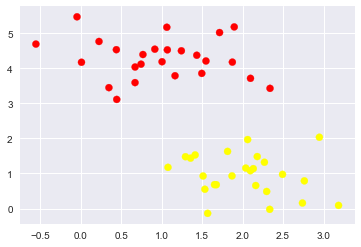

In [24]:
#随机来点数据
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

随便的画几条分割线，哪个好来这？

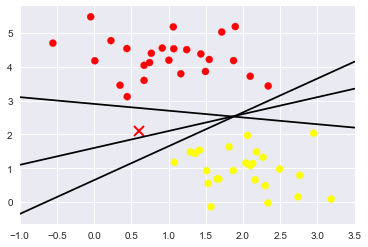

In [25]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

## Support Vector Machines: 最小化 *雷区*


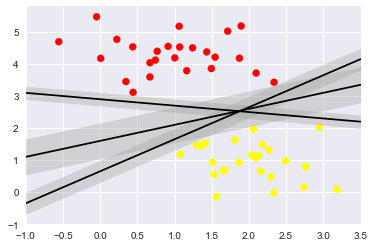

In [26]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### 训练一个基本的SVM


In [27]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
#绘图函数
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

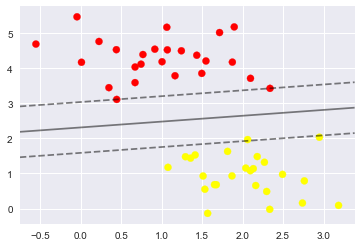

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

* 这条线就是我们希望得到的决策边界啦

* 观察发现有3个点做了特殊的标记，它们恰好都是边界上的点

* 它们就是我们的*support vectors*（支持向量）

* 在Scikit-Learn中, 它们存储在这个位置 ``support_vectors_``（一个属性）

In [30]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

* 观察可以发现，只需要支持向量我们就可以把模型构建出来

* 接下来我们尝试一下，用不同多的数据点，看看效果会不会发生变化

* 分别使用60个和120个数据点

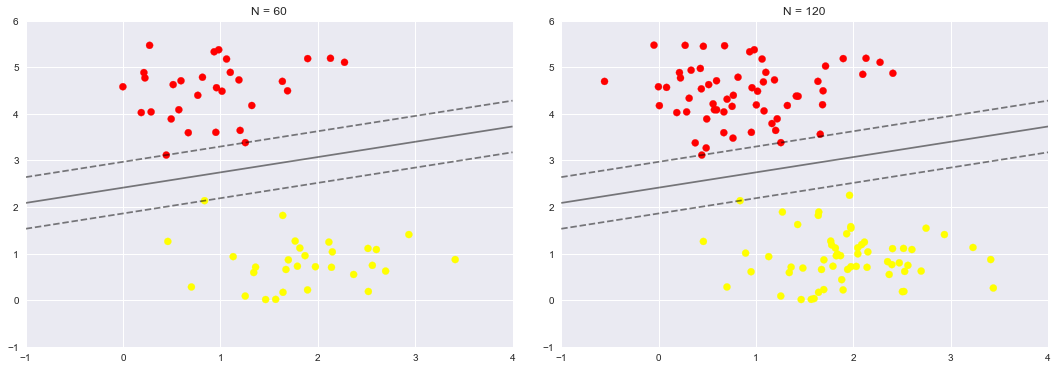

In [31]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

* 左边是60个点的结果，右边的是120个点的结果
* 观察发现，只要支持向量没变，其他的数据怎么加无所谓！

### 引入核函数的SVM
* 首先我们先用线性的核来看一下在下面这样比较难的数据集上还能分了吗？


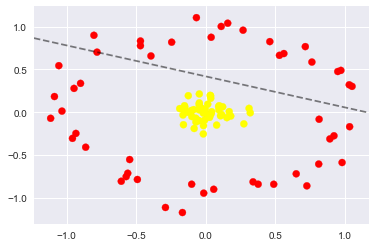

In [32]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

* 坏菜喽，分不了了，那咋办呢？试试高维核变换吧！

* We can visualize this extra data dimension using a three-dimensional plot:

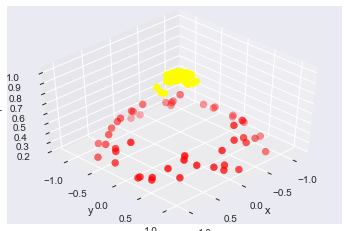

In [33]:
#加入了新的维度
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=45, azim=45, X=X, y=y)

In [34]:
#加入径向基函数
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

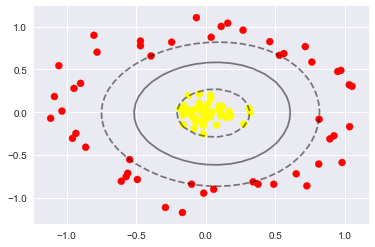

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

使用这种核支持向量机，我们学习一个合适的非线性决策边界。这种核变换策略在机器学习中经常被使用！

### 调节SVM参数: Soft Margin问题



### 调节kernel参数
* 线性划分：   kernel='linear'
* 高斯划分：   kernel='rbf'


### 调节C参数
* 当C趋近于无穷大时：意味着分类严格不能有错误
* 当C趋近于很小的时：意味着可以有更大的错误容忍

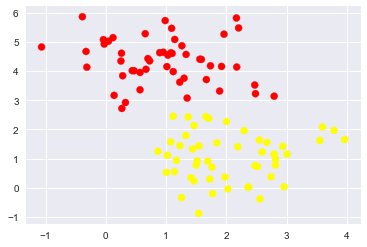

In [36]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

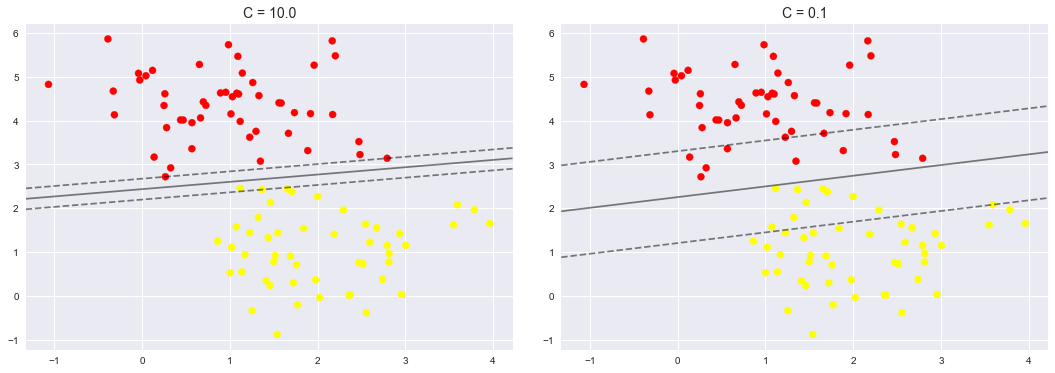

In [37]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

### 调节gamma参数
* 当gamma趋近于无穷大时：越容易过拟合
* 当gamma趋近于很小的时：泛化能力强

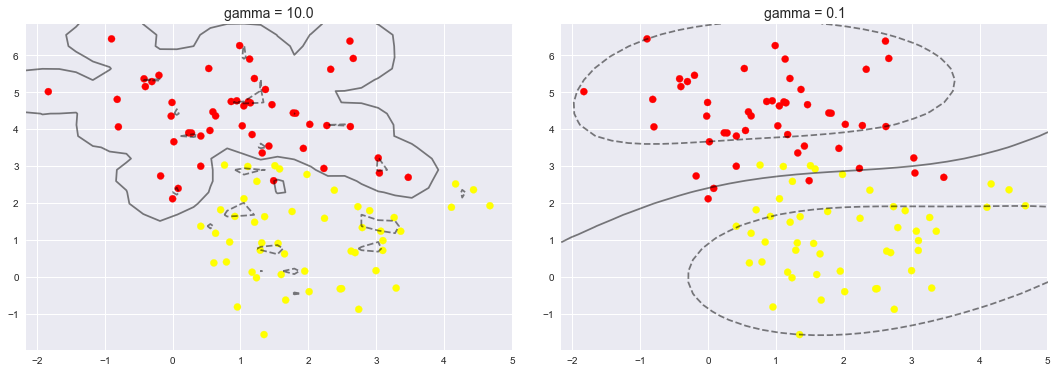

In [38]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('gamma = {0:.1f}'.format(gamma), size=14)